In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

Gradient descent

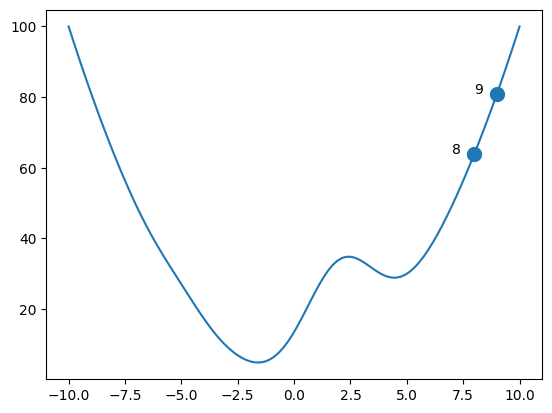

In [3]:
def sphere_2D(x):
    return x**2

def sphere_with_holes(x):
    return x**2 + 30*np.exp(-0.2*(x-2)**2) + 2*np.exp(-0.5*(x+5)**2)

def rasstrigin_2D(x):
    return x**2 - 22*np.cos(2*np.pi*x) + 20

def min_fn(x):
    return sphere_with_holes(x)

x_min = -10
x_max = 10

def plot_curve():
    x_sp = np.linspace(x_min, x_max, 100)
    y_sp = min_fn(x_sp)
    plt.plot(x_sp, y_sp)

def sp(x_p):
    plot_curve()

    plt.scatter([x_p],min_fn(x_p), s=200)
    plt.show()

def sp_many(x):
    plot_curve()

    plt.scatter(x,[min_fn(x) for x in x], s=100)
    for x in x:
        plt.text(x - 1, min_fn(x), x)


sp_many([8, 9])



In [4]:
x_train = np.array([
    [1, 1],
    [0, 1],
    [1, 0],
    [0, 0],
])

y_train = np.array([
    [1],
    [0],
    [0],
    [0],
])

# y_train = np.array([
#     [0],
#     [1],
#     [1],
#     [0],
# ])

# np.random.seed(0)

class LayerDense:
    @staticmethod
    def relu(x):
        return np.maximum(0, x)
    
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def heaviside(x):
        return np.heaviside(x, 0)
    
    @staticmethod
    def softmax(x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        probs = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        return probs

    def __init__(self, inputs_len, neurons_len, activation=relu):
        self.weights = np.random.rand(inputs_len, neurons_len)
        self.biases = np.zeros(neurons_len)
        self.activation = activation

    def forward(self, inputs):
        self.output = self.activation(np.dot(inputs, self.weights) + self.biases)



class NeuralNetwork:
    def __init__(self):
        self.layers = []

    def add(self, layer):
        self.layers.append(layer)

    def forward(self, inputs):
        for layer in self.layers:
            layer.forward(inputs)
            inputs = layer.output

    def fit(self, inputs, targets, lp=0.01, n_iter=10):
        for _ in range(n_iter):
            print(f'iter {_}')
            for input, target in zip(inputs, targets):
                self.updateWeightsBiases(input, target, lp)

    def updateWeightsBiases(self, input, target, lp):
        self.forward(input)
        loss = self.calculate_loss(target)
        print(f'loss {loss}')

        for layer in self.layers:
            for i in range(len(layer.weights)):
                layer.weights[i] = layer.weights[i] + lp * loss * input[i]

            layer.biases = layer.biases + lp * loss 

    def calculate_loss(self, target):
        # return np.mean((target - self.output)**2)
        return target - self.layers[-1].output
    
    def predict(self, inputs):
        self.forward(inputs)
        return self.layers[-1].output


mlp = NeuralNetwork()


mlp.add(LayerDense(2, 1, LayerDense.heaviside))





In [6]:
mlp.fit(x_train, y_train, 0.1, 3)

iter 0
loss [0.]
loss [-1.]
loss [0.]
loss [0.]
iter 1
loss [1.]
loss [-1.]
loss [0.]
loss [0.]
iter 2
loss [0.]
loss [0.]
loss [0.]
loss [0.]


In [7]:
mlp.layers[0].weights

array([[0.15367981],
       [0.43611684]])

In [2231]:
mlp.layers[0].output

array([0.])

In [8]:
plot_decision_boundary(mlp, x_train, y_train)

TypeError: '>' not supported between instances of 'NoneType' and 'float'

backpropagation

In [9]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

n_features = 2
n_classes = 2
n_samples= 300

X, y = make_blobs(n_samples=n_samples, centers=n_classes, cluster_std=0.10, random_state=0, n_features=n_features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# encoder = OneHotEncoder(sparse=False)
# y_train = encoder.fit_transform(y_train.reshape(-1, 1))
# y_test = encoder.transform(y_test.reshape(-1, 1))

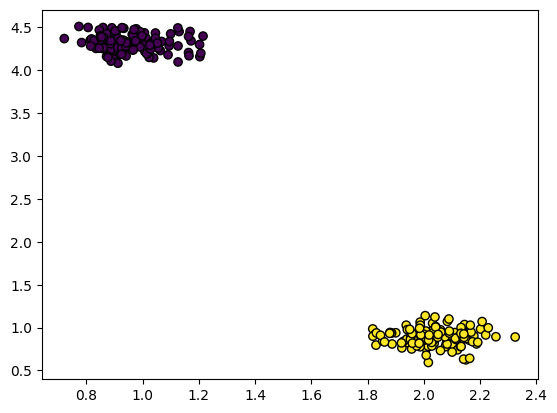

In [10]:
# scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:, 0], edgecolors='k', marker='o')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o')

In [11]:
def df(f, a):
    h = 0.0001
    return ( f(a + h) - f(a) ) / h

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def df_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [12]:
df(LayerDense.relu, 4)

0.9999999999976694

In [47]:
np.random.seed(0)

class LayerDense:
    @staticmethod
    def relu(x):
        return np.maximum(0, x)
    
    @staticmethod
    def sigmoid(x):
        x = np.clip(x, -500, 500)
                
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def heaviside(x):
        return np.heaviside(x, 0)
    
    @staticmethod
    def batch_softmax(x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        probs = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        return probs
    
    @staticmethod
    def softmax(x):
        exp_x = np.exp(x - np.max(x)) 
        
        return exp_x / np.sum(exp_x)
    
    def df_activation(self, activated_output):
        """
            activated_output -> aL = σ(zL)
        """

        if self.activation == LayerDense.sigmoid:
            return activated_output * (1 - activated_output)
        elif self.activation == LayerDense.relu:
            return np.where(activated_output <= 0, 0, 1)
        elif self.activation == LayerDense.softmax:
            s = activated_output.reshape(-1, 1)

            return np.diagflat(s) - np.dot(s, s.T)
        elif self.activation == LayerDense.batch_softmax:
            batch_size = activated_output.shape[0]
            # Initialize the tensor for storing the derivatives
            d_softmax = np.zeros((batch_size, activated_output.shape[1], activated_output.shape[1]))
            for i in range(batch_size):
                s = activated_output[i].reshape(-1, 1)
                d_softmax[i] = np.diagflat(s) - np.dot(s, s.T)

            return d_softmax


    def __init__(self, inputs_len, neurons_len, activation=relu):
        self.weights = np.random.randn(inputs_len, neurons_len)
        print(self.weights)
        self.biases = np.zeros(neurons_len)
        self.activation = activation

    def forward(self, inputs):
        self.output = self.activation(np.dot(inputs, self.weights) + self.biases)
        return self.output



class NeuralNetwork:
    @staticmethod
    def loss_mse(y_true, y_pred):
        return np.mean((y_true - y_pred)**2)
    
    
    @staticmethod
    def loss_binary_crossentropy(y_true, y_pred):
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        return -np.mean(y_true * np.log(y_pred_clipped) + (1 - y_true) * np.log(1 - y_pred_clipped))
    
    @staticmethod
    def loss_categorical_crossentropy(y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred))
    

    def df_loss(self, y_true, y_pred):
        if self.loss == NeuralNetwork.loss_mse:
            return y_pred - y_true
        elif self.loss == NeuralNetwork.loss_binary_crossentropy:
            y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
            return -y_true / y_pred_clipped + (1 - y_true) / (1 - y_pred_clipped)
        elif self.loss == NeuralNetwork.loss_categorical_crossentropy:
            return -y_true / y_pred
    

    def __init__(self, loss=loss_mse):
        self.loss = loss
        self.layers = []

    def add(self, layer):
        self.layers.append(layer)

    def forward(self, inputs):
        for layer in self.layers:
            layer.forward(inputs)
            inputs = layer.output

        return inputs

    def backward_auto(self, inputs, y_true, y_pred, lp, batch_size):
        layers_count = len(self.layers)

        for layer_index in reversed(range(0, layers_count)):
            layer = self.layers[layer_index]

            is_output_layer = layer_index == layers_count - 1
            
            if is_output_layer:
                # output layer

                layer.grad_loss_input = self.df_loss(y_true, y_pred) # derivative of loss function = ∇aL | samples -> neurons
                layer.activation_derivative = layer.df_activation(layer.output) # derivative of sigmoid(zL) = sigmoid(zL) * (1 - sigmoid(zL)) | samples -> neurons

                layer.delta = layer.grad_loss_input * layer.activation_derivative # δL = ∇aL * σ'(zL) | samples -> neurons

            else:
                prev_backward_layer = self.layers[layer_index + 1]        

                layer.propagated_error = np.dot(prev_backward_layer.delta, prev_backward_layer.weights.T) # δL * wL.T

                layer.activation_derivative = layer.df_activation(layer.output) 
                layer.delta = layer.propagated_error * layer.activation_derivative


            if layer_index != 0:
                next_backward_layer = self.layers[layer_index - 1]

                next_backward_layer_output = next_backward_layer.output.T
            else:
                next_backward_layer_output = inputs.T

            layer.grad_loss_weights = np.dot(next_backward_layer_output, layer.delta) # ∇wL = aL-1.T * δL | neurons -> neurons
            layer.grad_loss_biases = np.sum(layer.delta, axis=0, keepdims=True)  # ∇bL = δL | neurons -> 1

            layer.weights = layer.weights - lp * layer.grad_loss_weights / batch_size
            layer.biases = layer.biases - lp * layer.grad_loss_biases / batch_size

    def test_backward_2_layers_only(self, inputs, y_true, y_pred, lp, batch_size):
        output_layer = self.layers[1]

        output_error = self.df_loss(y_true, y_pred) # derivative of loss function
        output_derivative_activated = output_layer.df_activation(y_pred) # derivative of sigmoid(zL) = sigmoid(zL) * (1 - sigmoid(zL))
    
        output_delta = output_error * output_derivative_activated # δL = ∇aL * σ'(zL)
    
        hidden_layer = self.layers[0]

        vw_loss_output = np.dot(hidden_layer.output.T, output_delta) # ∇wL = aL-1.T * δL
        vb_loss_output = np.sum(output_delta, axis=0, keepdims=True) # ∇bL = δL


        output_layer.weights = output_layer.weights - lp * vw_loss_output / batch_size
        output_layer.biases = output_layer.biases - lp * vb_loss_output / batch_size

        # next prev layer

        activated_weights_from_output_to_hidden = output_layer.weights.T
        hidden_error = np.dot(output_delta, activated_weights_from_output_to_hidden) # δL * wL.T

        hidden_derivative_activated = hidden_layer.df_activation(hidden_layer.output) 
        hidden_delta = hidden_error * hidden_derivative_activated

        vw_loss_hidden = np.dot(inputs.T, hidden_delta)
        vb_loss_hidden = np.sum(hidden_delta, axis=0, keepdims=True)

        hidden_layer.weights = hidden_layer.weights - lp * vw_loss_hidden / batch_size
        hidden_layer.biases = hidden_layer.biases - lp * vb_loss_hidden / batch_size


    def fit(self, inputs, y_true, lp=0.01, n_iter=10, batch_size=10):
        for iter in range(n_iter):
            for i in range(0, len(inputs), batch_size):
                inputs_batch = inputs[i:i+batch_size]
                y_true_batch = y_true[i:i+batch_size]
                
                y_hats = self.forward(inputs_batch) # y_hats -> aL = sigmoid(zL) | predicted output

                self.backward_auto(inputs_batch, y_true_batch, y_hats, lp, batch_size)


            # if iter % 5 == 0:
            #     print(f'iter {iter}')
            #     print(f'loss {self.loss(y_true, self.forward(inputs))}')
        print(f'loss {self.loss(y_true, self.forward(inputs))}')
        
mlp = NeuralNetwork(loss=NeuralNetwork.loss_mse)

mlp.add(LayerDense(n_features, 4, LayerDense.relu))
mlp.add(LayerDense(4, 4, LayerDense.relu))
mlp.add(LayerDense(4, 1, LayerDense.sigmoid))

[[ 1.76405235  0.40015721  0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788  0.95008842 -0.15135721]]
[[-0.10321885  0.4105985   0.14404357  1.45427351]
 [ 0.76103773  0.12167502  0.44386323  0.33367433]
 [ 1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502]]
[[ 2.26975462 -1.45436567]
 [ 0.04575852 -0.18718385]
 [ 1.53277921  1.46935877]
 [ 0.15494743  0.37816252]]


In [48]:
reshaped_y_true = y_train.reshape(-1, 1) # [1, 0, 0, 0] -> [[1], [0], [0], [0]] | since here we have outputs from 

mlp.fit(X_train, reshaped_y_true, 0.03, 10, 1)

plot_decision_boundary(mlp, X_train, y_train) 

ValueError: shapes (4,1) and (2,2) not aligned: 1 (dim 1) != 2 (dim 0)

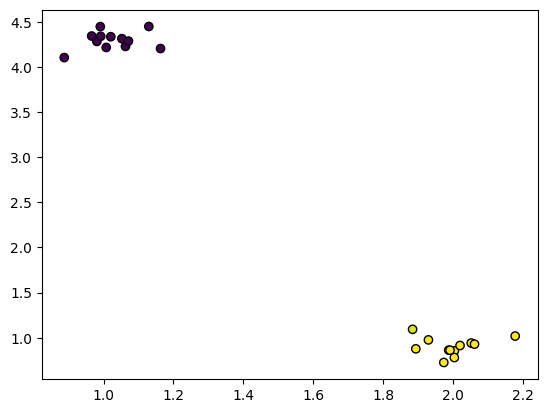

In [3371]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=mlp.forward(X_train).reshape(-1), edgecolors='k', marker='o')

In [35]:
LayerDense.batch_softmax(np.array([mlp.layers[0].output, mlp.layers[0].output])), LayerDense.softmax(mlp.layers[0].output)


AttributeError: 'LayerDense' object has no attribute 'output'

In [24]:
delta_3_batch_1_output = np.array(
[
     # 1 output
    [1], # sample 1
])



output_hiddeen_3_batch = np.array([
    # neuron 0 neuron 1  neuron 2  neuron 3
    [1, 2, 3, 4], # sample 1

])

# print(output_hiddeen_3_batch.T)


np.dot(delta_3_batch_1_output, output_hiddeen_3_batch) * np.array([1, 2, 3, 4])


array([[ 1,  4,  9, 16]])

In [3774]:
np.array([[1, 2, 3, 4]]).T

array([[1],
       [2],
       [3],
       [4]])